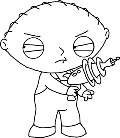

In [148]:
using ImageMagick, Images, ImageTransformations
download("https://upload.wikimedia.org/wikipedia/commons/thumb/1/17/Yin_yang.svg/699px-Yin_yang.svg.png", "yy.png")
im = Gray.(imresize(load("stewie.png"), ratio=0.3))
img = Int.(round.(im))
display(imresize(im, ratio=1))

In [149]:
y = vcat(img...)
length(y)

16560

In [150]:
include("../code/headers.jl")
q = 2
n = length(y)
R = reverse(0.2:0.2:0.8)
nrates = length(R)
m = Int.(round.(n*(1 .- R)))
seed = 234
algo = MS(maxiter=100, Tmax=1)
compressed = [zeros(Int,n) for r in R];

In [151]:
for j in 1:nrates
    print("Rate $j of $nrates: ")
    lm = LossyModel(q, n, m[j], y=y)
    breduction!(lm,1)
    res = solve!(lm, algo, randseed=seed, verbose=true, showprogress=true)
    compressed[j] = lm.x
    print("distortion ", round(res.distortion,digits=3), "\n")
end

Rate 1 of 4: 

Trial 1/1  65%|██████████████████████████▋              |  ETA: 0:01:34


distortion 0.04
Rate 2 of 4: 

Trial 1/1 100%|█████████████████████████████████████████| Time: 0:05:57


distortion 0.2
Rate 3 of 4: 

Trial 1/1 100%|█████████████████████████████████████████| Time: 0:08:49


distortion 0.3
Rate 4 of 4: 

Trial 1/1  61%|█████████████████████████                |  ETA: 0:04:28


distortion 0.249


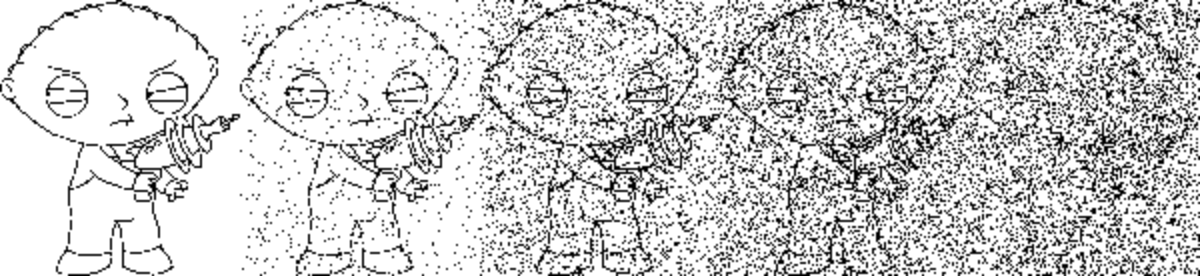

In [152]:
compressed_imgs = [reshape(x, size(im)) for x in compressed]
display(imresize(Gray.(hcat(img, compressed_imgs...)), ratio=2))